<img src="images/ipsa_logo.png" width="100" align="right">

# Ma422- 2022/2023

# <font color='black'> Introduction to Machine Learning</font>

---

1. [K-means clustering from scratch](#NN)
  
2. [K-means clustering with scikit-learn](#logit)

3. [Outliers detection](#logit)

---

The work has to be done in groups of 4 maximum. Each notebook must include student names below:
#### Students:   

## <font color='black'>Exercise 1: K-means clustering from scratch</font>

---

The objective of this exercise is to introduce and code the k-means clustering algorithm.


First we will import the packages that we will need throughout the exercise.

In [126]:
import os
import numpy as np
import re

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

from scipy import optimize
from scipy.io import loadmat
import utils



%load_ext autoreload
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will implement the algorithm for a 2D dataset.


### Implementation

K-means is an algorithm to automatically cluster data examples that are similar together. Notably, for a given training set $\{x^{(1)} , \cdots, x^{(m)}\}$ (where $x^{(i)} \in \mathbb{R}^n$), the goal is to define the clusters. The algorithm initializes randomly the centroids, and then it asigns the examples to the cluster corresponding to the closest centroids and then recomputes the centroids. 


The K-means algorithm is as follows:

```python
centroids = kMeansInitCentroids(X, K)
for i in range(iterations):
    # Cluster assignment step: Assign each data point to the
    # closest centroid. idx[i] corresponds to cˆ(i), the index
    # of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids)
    # Move centroid step: Compute means based on centroid
    # assignments
    centroids = computeMeans(X, idx, K)
```

Note that the final solution depends on the initial setting of the centroids. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

#### Determine the closest centroids

Complete the code in the function `findClosestCentroids`. This function takes the data matrix `X` and the locations of all centroids inside `centroids` and outputs a vector `idx` that holds the index of the closest centroid to every training example.

In this case, you can implement this using a loop over every training example and every centroid.

In [127]:
#EDIT THIS CELL
def findClosestCentroids(X, centroids):
    # Set the number of clusters
    K = centroids.shape[0]

    # The centroids are in the following variable
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================

    for i in range(X.shape[0]):
        min_dist = np.inf
        for j in range(K):
            dist = np.sum((X[i] - centroids[j])**2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    # =============================================================
    return idx

Once you have completed the code in `findClosestCentroids`, the following cell will run your code and you should see the output `[0 2 1]` corresponding to the centroid assignments for the first 3 examples.

In [128]:
data = loadmat(os.path.join('data', 'ex1data.mat'))
X = data['X']

K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)
print(idx)
print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

[0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]
Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


### Computing centroid means

Once the algorithm has performed assignments of every point to a centroid, the second part updates, for each centroid, the mean of the points that were assigned to it. 

Complete then the function `computeCentroids`. You can implement this function using a loop over the centroids.

In [129]:
#EDIT THIS CELL
def computeCentroids(X, idx, K):
    m, n = X.shape
    # The centroids are in the following variable
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE =======================

    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis=0)
   
    # =============================================================
    return centroids

Check your implementation by running the following cell.

In [130]:
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


## <font color='black'>Exercise 2: K-means clustering with scikit-learn</font>

---

The objective of this exercise is to present the use of the functionalities of scikit-learn concerning the clustering with k-means, as well as to contribute to a better understanding of this method and the impact on the results of the distribution data or initialization technique (random initialization or k-means++).

We start by generating five groups of 100 vectors each in 3D space, each following a normal distribution (with zero mean and unit variance). We apply to each group a different translation in space, generate the group labels, build the total data set and then shuffle the rows of this set:

In [131]:
import numpy as np    
from sklearn.utils import shuffle

# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# generate labels for each group
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concatenation of data in a matrix
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# random permutation of the rows of the matrix data
data, labels = shuffle(data, labels)

(500, 3)


We visualize the the data.

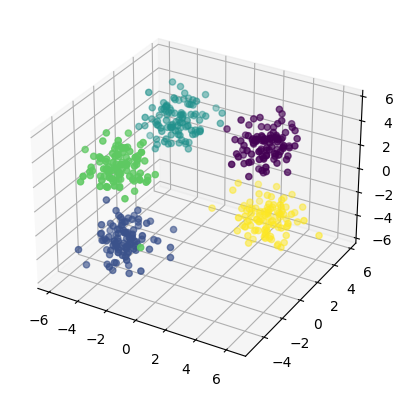

In [132]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# The color of the dots depends on their label
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()

Apply now the K-means clustering algorithm to fit the data, first with a single trial (a single initialization followed by a single execution of K-means, n_init = 1) using the k-means++ initialization method.

In [133]:
# ====================== YOUR CODE HERE ======================

#Apply now the K-means clustering algorithm to fit the data, first with a single trial (a single initialization followed by a single execution of K-means, n_init = 1) using the k-means++ initialization method.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++')
kmeans.fit(data)
    
# =============================================================

KMeans(n_clusters=5, n_init=1)

Get the predicted groups for the data using. Groups associated with training examples are also stored in the `kmeans.labels_` attribute.

In [134]:
# ====================== YOUR CODE HERE ======================

y_kmeans = kmeans.predict(data)

# =============================================================

Plot the results of this clustering.

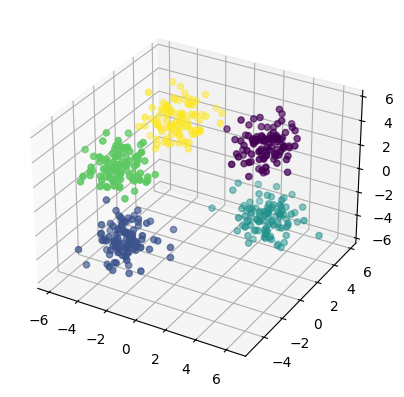

In [135]:
# ====================== YOUR CODE HERE ======================

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=y_kmeans)
plt.show()

# =============================================================

Evaluate the consistency between the initial data and the clusters found by K-means using the `adjusted_rand_score`.

In [136]:
# ====================== YOUR CODE HERE ======================

from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels, y_kmeans)
    
# =============================================================

0.9949848742198414

### Questions:

1. Repeat the clustering several times with each of these two initialization methods and each time examine the consistency of the groups obtained with the starting groups. What do you notice? Explain.

2. Vary the number of clusters (n_clusters) and re-examine the stability of the results using the `adjusted_rand_score`. Explain what you see.

## <font color='black'>Exercise 3: Outlier detection </font>

In this exercise,a Gaussian Mixture Model is investigated to detect anomalous behavior in server computers. The features measure the throughput (mb/s) and latency (ms) of response of each server.

In [137]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [138]:
data = scipy.io.loadmat('data/ex3data.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

#### Part 1:

You will use a Gaussian model to detect anomalous examples in your dataset. You will use a 2D dataset that will allow you to visualize what the algorithm is doing.

In [139]:
ax = sns.scatterplot(data['X'][:,0], data['X'][:,1], marker='x', color='b', s=20)
ax.set(xlabel='Latency (ms)', ylabel='Throughput (mb/s)', title='The dataset');

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

To perform anomaly detection, you need to fit a model to the data’s distribution. 
Given a training set $\{x^{(1)}, ..., x^{(m)}\}$, you want to estimate the Gaussian distribution for each of the features $x_i$. For each feature, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the
i-th dimension $\{x^{(1)}_i, ..., x^{(m)}_i\}$. 

The Gaussian distribution is given by:

$$p(x;\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}$$ where $\mu$ is the mean and $\sigma^2$ is the variance. 


Start by estimating the parameters of the density distribution. 

In [ ]:
#EDIT THIS CELL
def estimate_gaussian(X):
     
        m = X.shape[0]

    # ====================== YOUR CODE HERE =======================
   

    # =============================================================
    return mean, var

The multivariate gaussian distribution is an extension of anomaly detection and may (or may not) catch more anomalies. Model $p(x)$ all in one go with paramaters $\mu$ $\in$ $\mathbf{R}^n$ and $\Sigma$ $\in$ $\mathbf{R}^{n\times{n}}$.
$$p(x;\mu,\Sigma)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp{(-1/2(x-\mu)^T\Sigma^{-1}(x-\mu))}$$

In [ ]:
#EDIT THIS CELL
def multivariateGaussian(X,mean,var):
     

    # ====================== YOUR CODE HERE =======================
   

    # =============================================================
    return p

Estimate now the mean and the variance then returns the density of the multivariate normal at each data point (row) of X. 

In [ ]:
# ====================== YOUR CODE HERE =======================
   

# =============================================================

Check your implementation by running the following cell.

In [ ]:
X = data['X']
mu, sigma2 = estimate_gaussian(X)
print('Mean and variance after computations:')
print(mu)
print('\nThe mean should be')
print('   [ 14.11222578 14.99771051 ]')
print(sigma2)
print('\nThe variance should be')
print('   [ 1.83263141 1.70974533 ]')

You can now visualize the dataset and its estimated distribution. This visualization shows the probability density function of the Gaussian distribution. Each example has a location $(x_1, x_2)$ that depends on its feature values.

In [ ]:
def visualize_fit(X, mu, sigma2):
    x, y = np.mgrid[0:35.5:0.5, 0:35.5:0.5]
    pos = np.dstack((x, y))
    z = multivariate_gaussian(pos, mu, sigma2)
    z = z.reshape(x.shape)
    ax = sns.scatterplot(X[:,0], X[:,1], marker='x', color='b', s=20)
    ax.contour(x, y, z, levels=10.0**(np.arange(-20,0,3)))
    ax.set(xlabel='Latency (ms)', ylabel='Throughput (mb/s)', title='Visualizing Gaussian Fit');
    ax.set_xlim(0,30)
    ax.set_ylim(0,30)
    return ax

visualize_fit(X, mu, sigma2)

#### Part 2:

Run the second part of the exercise then describe the obtained results. Conclude. 

In [ ]:
def select_threshold(yval, pval):
    best_f1 = 0
    best_epsilon = 0
    step = (np.max(pval) - np.min(pval))/1000
    for epsilon in np.arange(np.min(pval), np.max(pval), step):
        y_pred = pval < epsilon
        tp = np.sum(np.logical_and(yval == 1, y_pred == 1))
        fp = np.sum(np.logical_and(yval == 0, y_pred == 1))
        fn = np.sum(np.logical_and(yval == 1, y_pred == 0))
        
        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        
        f1 = (2*precision*recall)/(precision+recall)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    return best_epsilon, best_f1

In [ ]:
Xval = data['Xval']
yval= data['yval']
pval = multivariate_gaussian(Xval, mu, sigma2)
epsilon, f1 = select_threshold(yval.ravel(), pval)

In [ ]:
print('Best epsilon found using cross-validation:', epsilon)
print('Best F1 on Cross Validation Set:', f1)
print('   (you should see a value epsilon of about 8.99e-05)')
print('   (you should see a Best F1 value of  0.875000)')

In [ ]:
outliers = np.argwhere(p < epsilon)
outliers = outliers.T[0]

In [ ]:
ax = visualize_fit(X, mu, sigma2)
ax.scatter(x=X[outliers,0], y=X[outliers,1], color='r', facecolors='none', s=200)
ax.set(title='The classified anomalies');